<div class="output_png output_subarea output_execute_result">
<center>
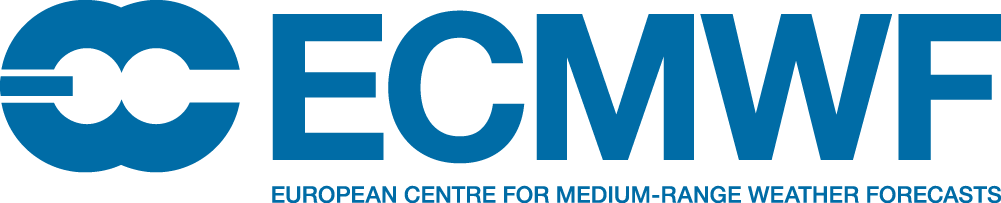
</div>

# Experimental: AIFS (ECMWF) ML model: 2m temperature and 10m wind

This notebook will provide you guidance how to explore and plot ECMWF AIFS open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/aifs_medium-2t-wind  


<div class="output_png output_subarea output_execute_result">
<center>
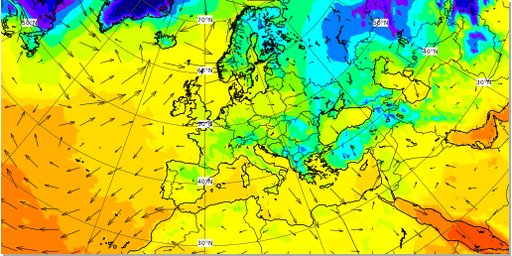</center>
</div>

The full list of available AIFS Open data products can be found [here](https://www.ecmwf.int/en/forecasts/dataset/aifs-machine-learning-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS+from+IFS+and+AIFS).  

Access to ECMWF AIFS data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 3 parameters :

* [2 metre temperature](https://codes.ecmwf.int/grib/param-db/167)
* [10 metre U wind component](https://codes.ecmwf.int/grib/param-db/165)
* [10 metre V wind component](https://codes.ecmwf.int/grib/param-db/166)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [2]:
import earthkit.data
import earthkit.plots

In [3]:
parameters = ['10u', '10v','2t']
filename = 'aifs_medium-2t-wind.grib'
filename

'aifs_medium-2t-wind.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [4]:
data = earthkit.data.from_source(
    "ecmwf-open-data",
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    model="aifs",
    param=parameters,
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the files.

The **describe()** function will give us the overview of the dataset.  

In [5]:
data.describe()

,,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
shortName,typeOfLevel,,,,,,,,,,
10u,heightAboveGround,10,20250110,0,12,None,165,ai,oper,fc,0001
10v,heightAboveGround,10,20250110,0,12,None,166,ai,oper,fc,0001
2t,heightAboveGround,2,20250110,0,12,None,167,ai,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [6]:
data.describe('2t')

shortName,2t
typeOfLevel,heightAboveGround
level,2
date,20250110
time,0
step,12
number,None
paramId,167
class,ai
stream,oper
type,fc


We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10u,heightAboveGround,10,20250110,0,12,fc,None,regular_ll
1,ecmf,10v,heightAboveGround,10,20250110,0,12,fc,None,regular_ll
2,ecmf,2t,heightAboveGround,2,20250110,0,12,fc,None,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter what we need.  
Feel free to use **describe()** to inspect the other filtered fields.

In [8]:
t2m = data.sel(shortName= "2t")
u = data.sel(shortName= "10u")
v = data.sel(shortName= "10v")

t2m.describe()

,,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
shortName,typeOfLevel,,,,,,,,,,
2t,heightAboveGround,2,20250110,0,12,None,167,ai,oper,fc,0001


In [9]:
t2m_style = earthkit.plots.styles.Style(
    colors=[
        '#00007f', '#0000d8', '#3f00ff', '#7f00ff', '#007fff',
        '#00ffff', '#00ff7f', '#80ff00', '#daff00', '#ffff00',
        '#fff500', '#ffda00', '#ffb000', '#ff7f00', '#ff4f00',
        '#ff2500', '#ff0a00', '#ff0000', '#ff00ff',
    ],
    levels=range(-32, 41, 4),
    units="celsius",
    extend="both",
)

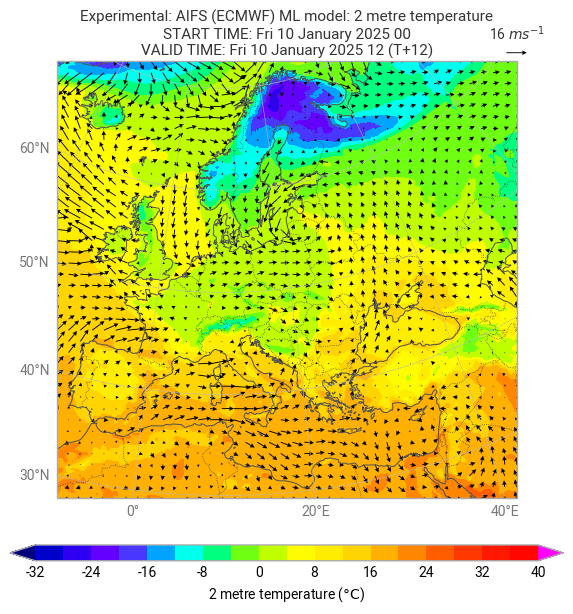

In [10]:
chart = earthkit.plots.Map(domain="Europe")

chart.contourf(t2m, style=t2m_style, transform_first=True)
chart.quiver(u, v, width=0.002, headwidth=5)

chart.legend()

chart.title(
    "Experimental: AIFS (ECMWF) ML model: {variable_name!0}\n"
    "START TIME: {base_time:%a %d %B %Y %H}\n"
    "VALID TIME: {valid_time:%a %d %B %Y %H} (T+{lead_time})",
    fontsize=11,
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.show()